In [1]:
library(tidyverse)
library(ggplot2)
library(gapminder)
library(socviz)
library(ggsci)
library("gridExtra")
library(stringr)
library(scales)
library("ggrepel")
library(cowplot)
library(gg.gap)
library(ggpol)
options(warn=-1)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### Figure 7A

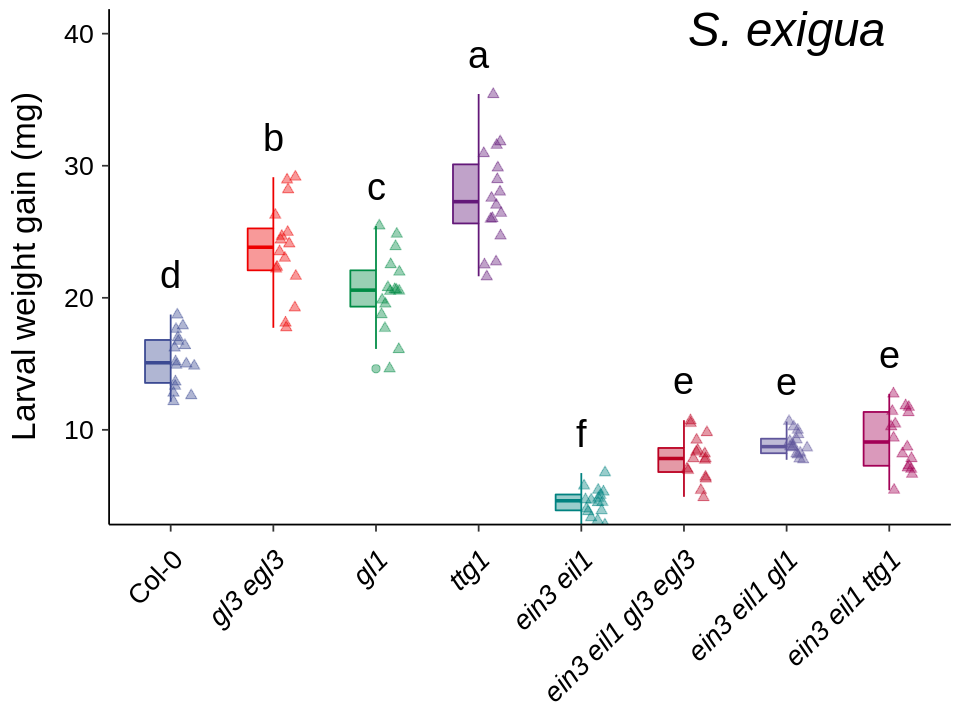

In [2]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7A.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:17)],1,max) + 3

# transformat df
df_long <- gather(df, replicate, value, R1:R16)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "gl3 egl3",
                                                      "gl1",
                                                      "ttg1",
                                                      "ein3 eil1",                                                      
                                                      "ein3 eil1 gl3 egl3",                                                      
                                                      "ein3 eil1 gl1",                                                      
                                                      "ein3 eil1 ttg1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1")),               
               expression(italic("ein3 eil1 gl3 egl3")),               
               expression(italic("ein3 eil1 gl1")),               
               expression(italic("ein3 eil1 ttg1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
A7 <- p + geom_boxjitter(alpha=0.4,
                         width=0.5,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Larval weight gain (mg)")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    annotate(geom="text", x=7, y=40,size=10,
            label=expression(italic("S. exigua")))
A7


In [4]:
df[c(1:5),]

,genotype,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,sig,max
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,Col-0,17.03,12.83,12.63,14.83,15.13,17.93,16.73,16.23,16.43,15.03,14.93,17.63,13.33,13.63,18.73,12.13,d,21.73
2,gl3 egl3,24.43,24.63,23.53,24.13,22.23,28.93,17.73,29.13,28.23,23.03,18.13,26.23,22.33,24.93,19.23,21.63,b,32.13
3,gl1,14.63,25.43,17.73,24.83,20.83,20.63,18.73,22.53,20.63,20.53,19.83,16.13,20.53,19.53,23.93,21.93,c,28.43
4,ttg1,31.53,31.83,24.73,29.83,26.43,26.03,27.03,28.03,30.93,27.53,28.93,25.93,22.73,35.43,21.63,22.53,a,38.43
5,ein3 eil1,6.73,4.83,5.33,3.83,5.43,3.13,4.53,3.33,4.73,5.03,2.83,5.73,4.73,3.93,4.03,4.53,f,9.73


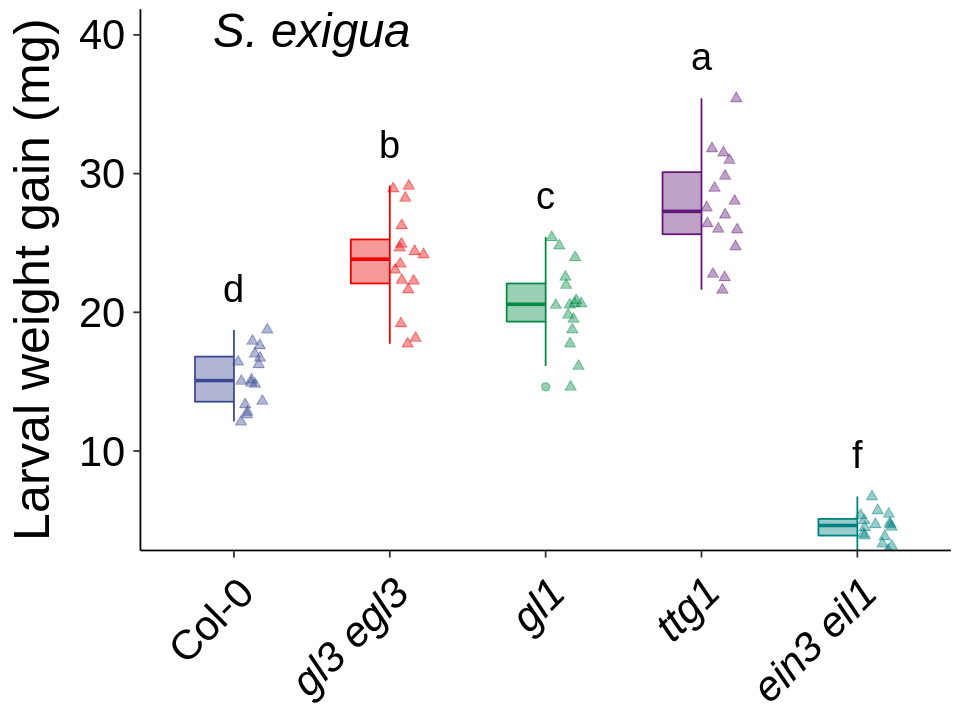

In [21]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7A.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

df <- df[c(1:5),]
# set df for sig note
df$max <- apply(df[,c(2:17)],1,max) + 3

# transformat df
df_long <- gather(df, replicate, value, R1:R16)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "gl3 egl3",
                                                      "gl1",
                                                      "ttg1",
                                                      "ein3 eil1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=25, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=25, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=30, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
nsfc <- p + geom_boxjitter(alpha=0.4,
                         width=0.5,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Larval weight gain (mg)")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    annotate(geom="text", x=1.5, y=40,size=10,
            label=expression(italic("S. exigua")))
nsfc


## Figure 7C

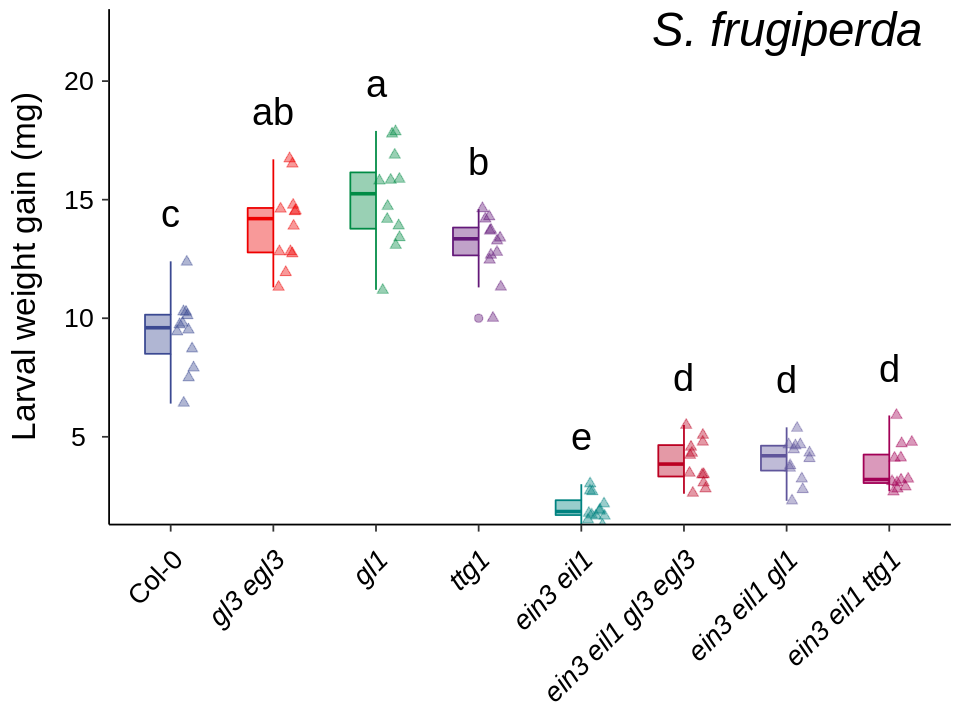

In [3]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(2:13)],1,max) + 2

# transformat df
df_long <- gather(df, replicate, value, R1:R12)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "gl3 egl3",
                                                      "gl1",
                                                      "ttg1",
                                                      "ein3 eil1",                                                      
                                                      "ein3 eil1 gl3 egl3",                                                      
                                                      "ein3 eil1 gl1",                                                      
                                                      "ein3 eil1 ttg1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1")),               
               expression(italic("ein3 eil1 gl3 egl3")),               
               expression(italic("ein3 eil1 gl1")),               
               expression(italic("ein3 eil1 ttg1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
C7 <- p + geom_boxjitter(alpha=0.4,
                         width=0.5,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Larval weight gain (mg)")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    annotate(geom="text", x=7, y=22,size=10,
            label=expression(italic("S. frugiperda")))
C7


In [17]:
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)
df <- df[c(1:5),]
df

,genotype,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,sig
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Col-0,9.5,10.3,9.8,7.5,8.7,6.4,7.9,9.4,10.1,9.7,10.3,12.4,c
2,gl3 egl3,14.5,11.9,14.5,12.8,16.7,16.5,14.8,12.7,14.6,11.3,12.8,13.9,ab
3,gl1,11.2,17.8,13.9,15.9,14.2,16.9,17.9,15.8,13.4,15.8,14.7,13.1,a
4,ttg1,13.7,10.0,12.7,11.3,12.8,13.3,12.5,14.6,13.4,14.2,14.3,13.7,b
5,ein3 eil1,1.8,2.2,2.7,1.9,1.9,2.7,3.0,1.5,1.7,1.7,1.3,1.7,e


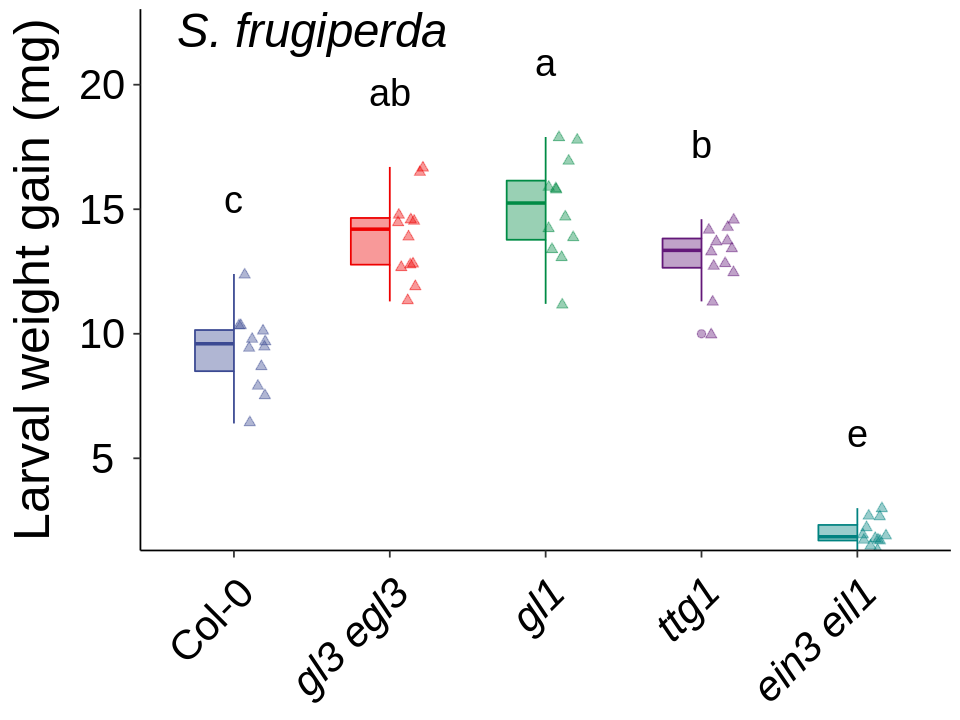

In [27]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7B.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

df <- df[c(1:5),]
# set df for sig note
df$max <- apply(df[,c(2:13)],1,max) + 3

# transformat df
df_long <- gather(df, replicate, value, R1:R12)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "gl3 egl3",
                                                      "gl1",
                                                      "ttg1",
                                                      "ein3 eil1"))


# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=25, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=25, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=30, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
#               legend.title = element_blank(),
#               legend.position = c(0.82,0.7),
#               legend.position = "bottom",
#               legend.justification = "center",
#               legend.text = element_text(size = 18),
#               legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("gl3 egl3")),
               expression(italic("gl1")),
               expression(italic("ttg1")),
               expression(italic("ein3 eil1"))
               )

p <- ggplot(df_long, aes(genotype, value, fill=genotype, color=genotype))
nsfc <- p + geom_boxjitter(alpha=0.4,
                         width=0.5,
                         jitter.size=2,
                         jitter.shape=24,
                         jitter.width = 0.02,
                         outlier.size=2,
                         errorbar.draw=FALSE,
                         show.legend=FALSE) +
    theme_custom() +
    scale_fill_aaas() +
    scale_color_aaas() +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Larval weight gain (mg)")) +
    geom_text(data=df,aes(x=genotype,y=max,label=sig),size=8,color="black",show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    annotate(geom="text", x=1.5, y=22,size=10,
            label=expression(italic("S. frugiperda")))
nsfc


## Figure 7E

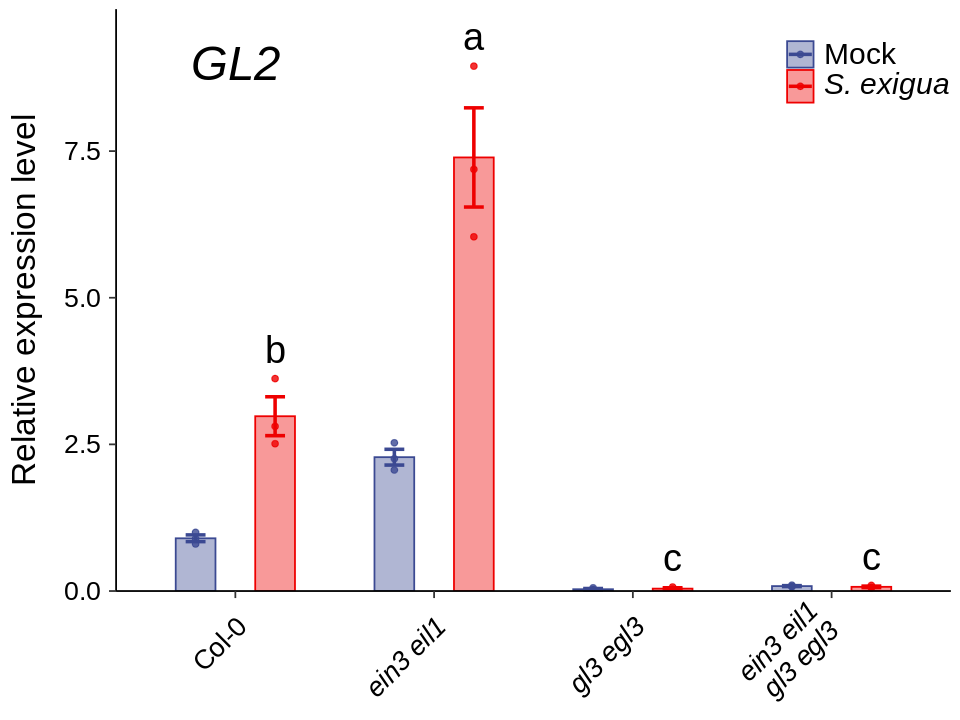

In [4]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7E.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:5)],1,max) + 0.5
# transformat df
df_long <- gather(df, replicate, value, R1:R3)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",                                          
                                                      "ein3 eil1 gl3 egl3"))
df_long$treatment <- factor(df_long$treatment, levels=c("mock",
                                                        "S.exigua"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
              legend.title = element_blank(),
              legend.position = c(0.9,0.9),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 18),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil1")),
               expression(italic("gl3 egl3")),                           
               expression(italic("ein3 eil1 \n gl3 egl3"))
               )

p <- ggplot(df_long, aes(genotype,value, fill=treatment, color=treatment)) 
E7 <- p + stat_summary(fun="mean", 
                 geom="bar", 
                 position = position_dodge(0.8),
#                  position = "dodge",
                 width=0.4,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.8),
                 width = 0.2,                 
#                  position=position_dodge2(width=0.5,padding=0.5),
                 size=1) + 
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.8)) +

    theme_custom() +
    scale_fill_aaas(labels=expression("Mock",italic("S. exigua")),
                    guide=guide_legend(ncol=1)) +
    scale_color_aaas(labels=expression("Mock",italic("S. exigua")),
                    guide=guide_legend(ncol=1)) +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,
              aes(y=max,label=sig),
              size=8,color="black",
              position = position_dodge(0.8),
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    annotate(geom="text", x=1, y=9,size=10,
            label=expression(italic("GL2")))
E7


## Figure 2F

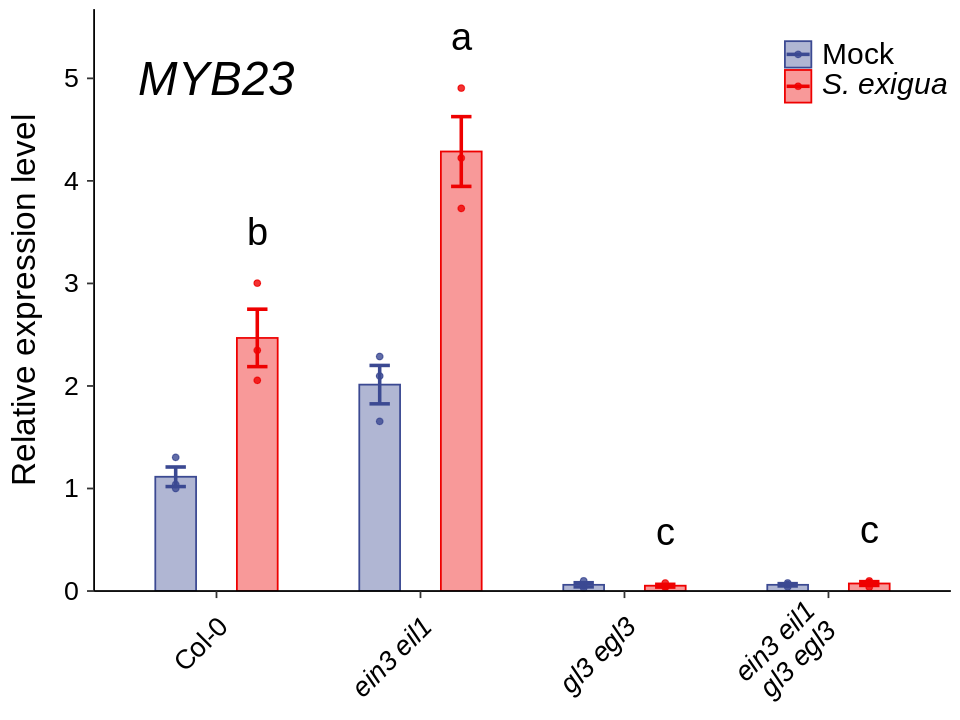

In [5]:
# data input and reshape
df <- read.csv("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7F.csv",
                header=TRUE,
                stringsAsFactors=TRUE)

# set df for sig note
df$max <- apply(df[,c(3:5)],1,max) + 0.5
# transformat df
df_long <- gather(df, replicate, value, R1:R3)

# set genotype order
df_long$genotype <- factor(df_long$genotype, levels=c("Col-0",
                                                      "ein3 eil1",
                                                      "gl3 egl3",                                          
                                                      "ein3 eil1 gl3 egl3"))
df_long$treatment <- factor(df_long$treatment, levels=c("mock",
                                                        "S.exigua"))

# set theme function 
theme_custom <- function (base_size = 11, base_family = "", base_line_size = base_size/22, 
    base_rect_size = base_size/22) 
{
    theme_bw(base_size = base_size, base_family = base_family, 
        base_line_size = base_line_size, base_rect_size = base_rect_size) %+replace% 
        theme(panel.border = element_blank(), 
              panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              axis.line = element_line(colour = "black", size = rel(1)),
              axis.ticks.length=unit(.15, "cm"),
              legend.key = element_blank(), 
              strip.background = element_rect(fill = "white", colour = "black", size = rel(2)), 
              complete = TRUE,
#               axis.ticks.x = element_blank(),
              axis.text.x = element_text(size=16, angle=45, color="black",
                                         hjust=1, vjust=1,
                                         margin = margin(t = 10, r = 0, b = 0, l = 0)),
              axis.text.y = element_text(size=16, color="black", margin = margin(t = 0, r = 5, b = 0, l = 0)),
              axis.title.x = element_blank(),
              axis.title.y = element_text(size=20, angle=90, margin = margin(t = 0, r = 15, b = 0, l = 0)),
              strip.text.x = element_blank(),
              legend.title = element_blank(),
              legend.position = c(0.9,0.9),
#               legend.position = "bottom",
              legend.justification = "center",
              legend.text = element_text(size = 18),
              legend.text.align = 0
             )
}

# set figure size
options(repr.plot.width = 8, repr.plot.height = 6)

# generate x-tick label vector
xtick_labs <- c("Col-0",
               expression(italic("ein3 eil1")),
               expression(italic("gl3 egl3")),                           
               expression(italic("ein3 eil1 \n gl3 egl3"))
               )

p <- ggplot(df_long, aes(genotype,value, fill=treatment, color=treatment)) 
F7 <- p + stat_summary(fun="mean", 
                 geom="bar", 
                 position = position_dodge(0.8),
#                  position = "dodge",
                 width=0.4,
                 alpha=0.4) + 
    stat_summary(fun.data = mean_se, 
                 geom = "errorbar", 
                 position = position_dodge(width=0.8),
                 width = 0.2,                 
#                  position=position_dodge2(width=0.5,padding=0.5),
                 size=1) + 
    geom_jitter(alpha=0.8, 
                position = position_dodge(0.8)) +

    theme_custom() +
    scale_fill_aaas(labels=expression("Mock",italic("S. exigua")),
                    guide=guide_legend(ncol=1)) +
    scale_color_aaas(labels=expression("Mock",italic("S. exigua")),
                    guide=guide_legend(ncol=1)) +
    scale_x_discrete(labels=xtick_labs) +
    ylab(quote("Relative expression level")) +
    geom_text(data=df,
              aes(y=max,label=sig),
              size=8,color="black",
              position = position_dodge(0.8),
              show.legend=FALSE) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
    annotate(geom="text", x=1, y=5,size=10,
            label=expression(italic("MYB23")))
F7


## Combination

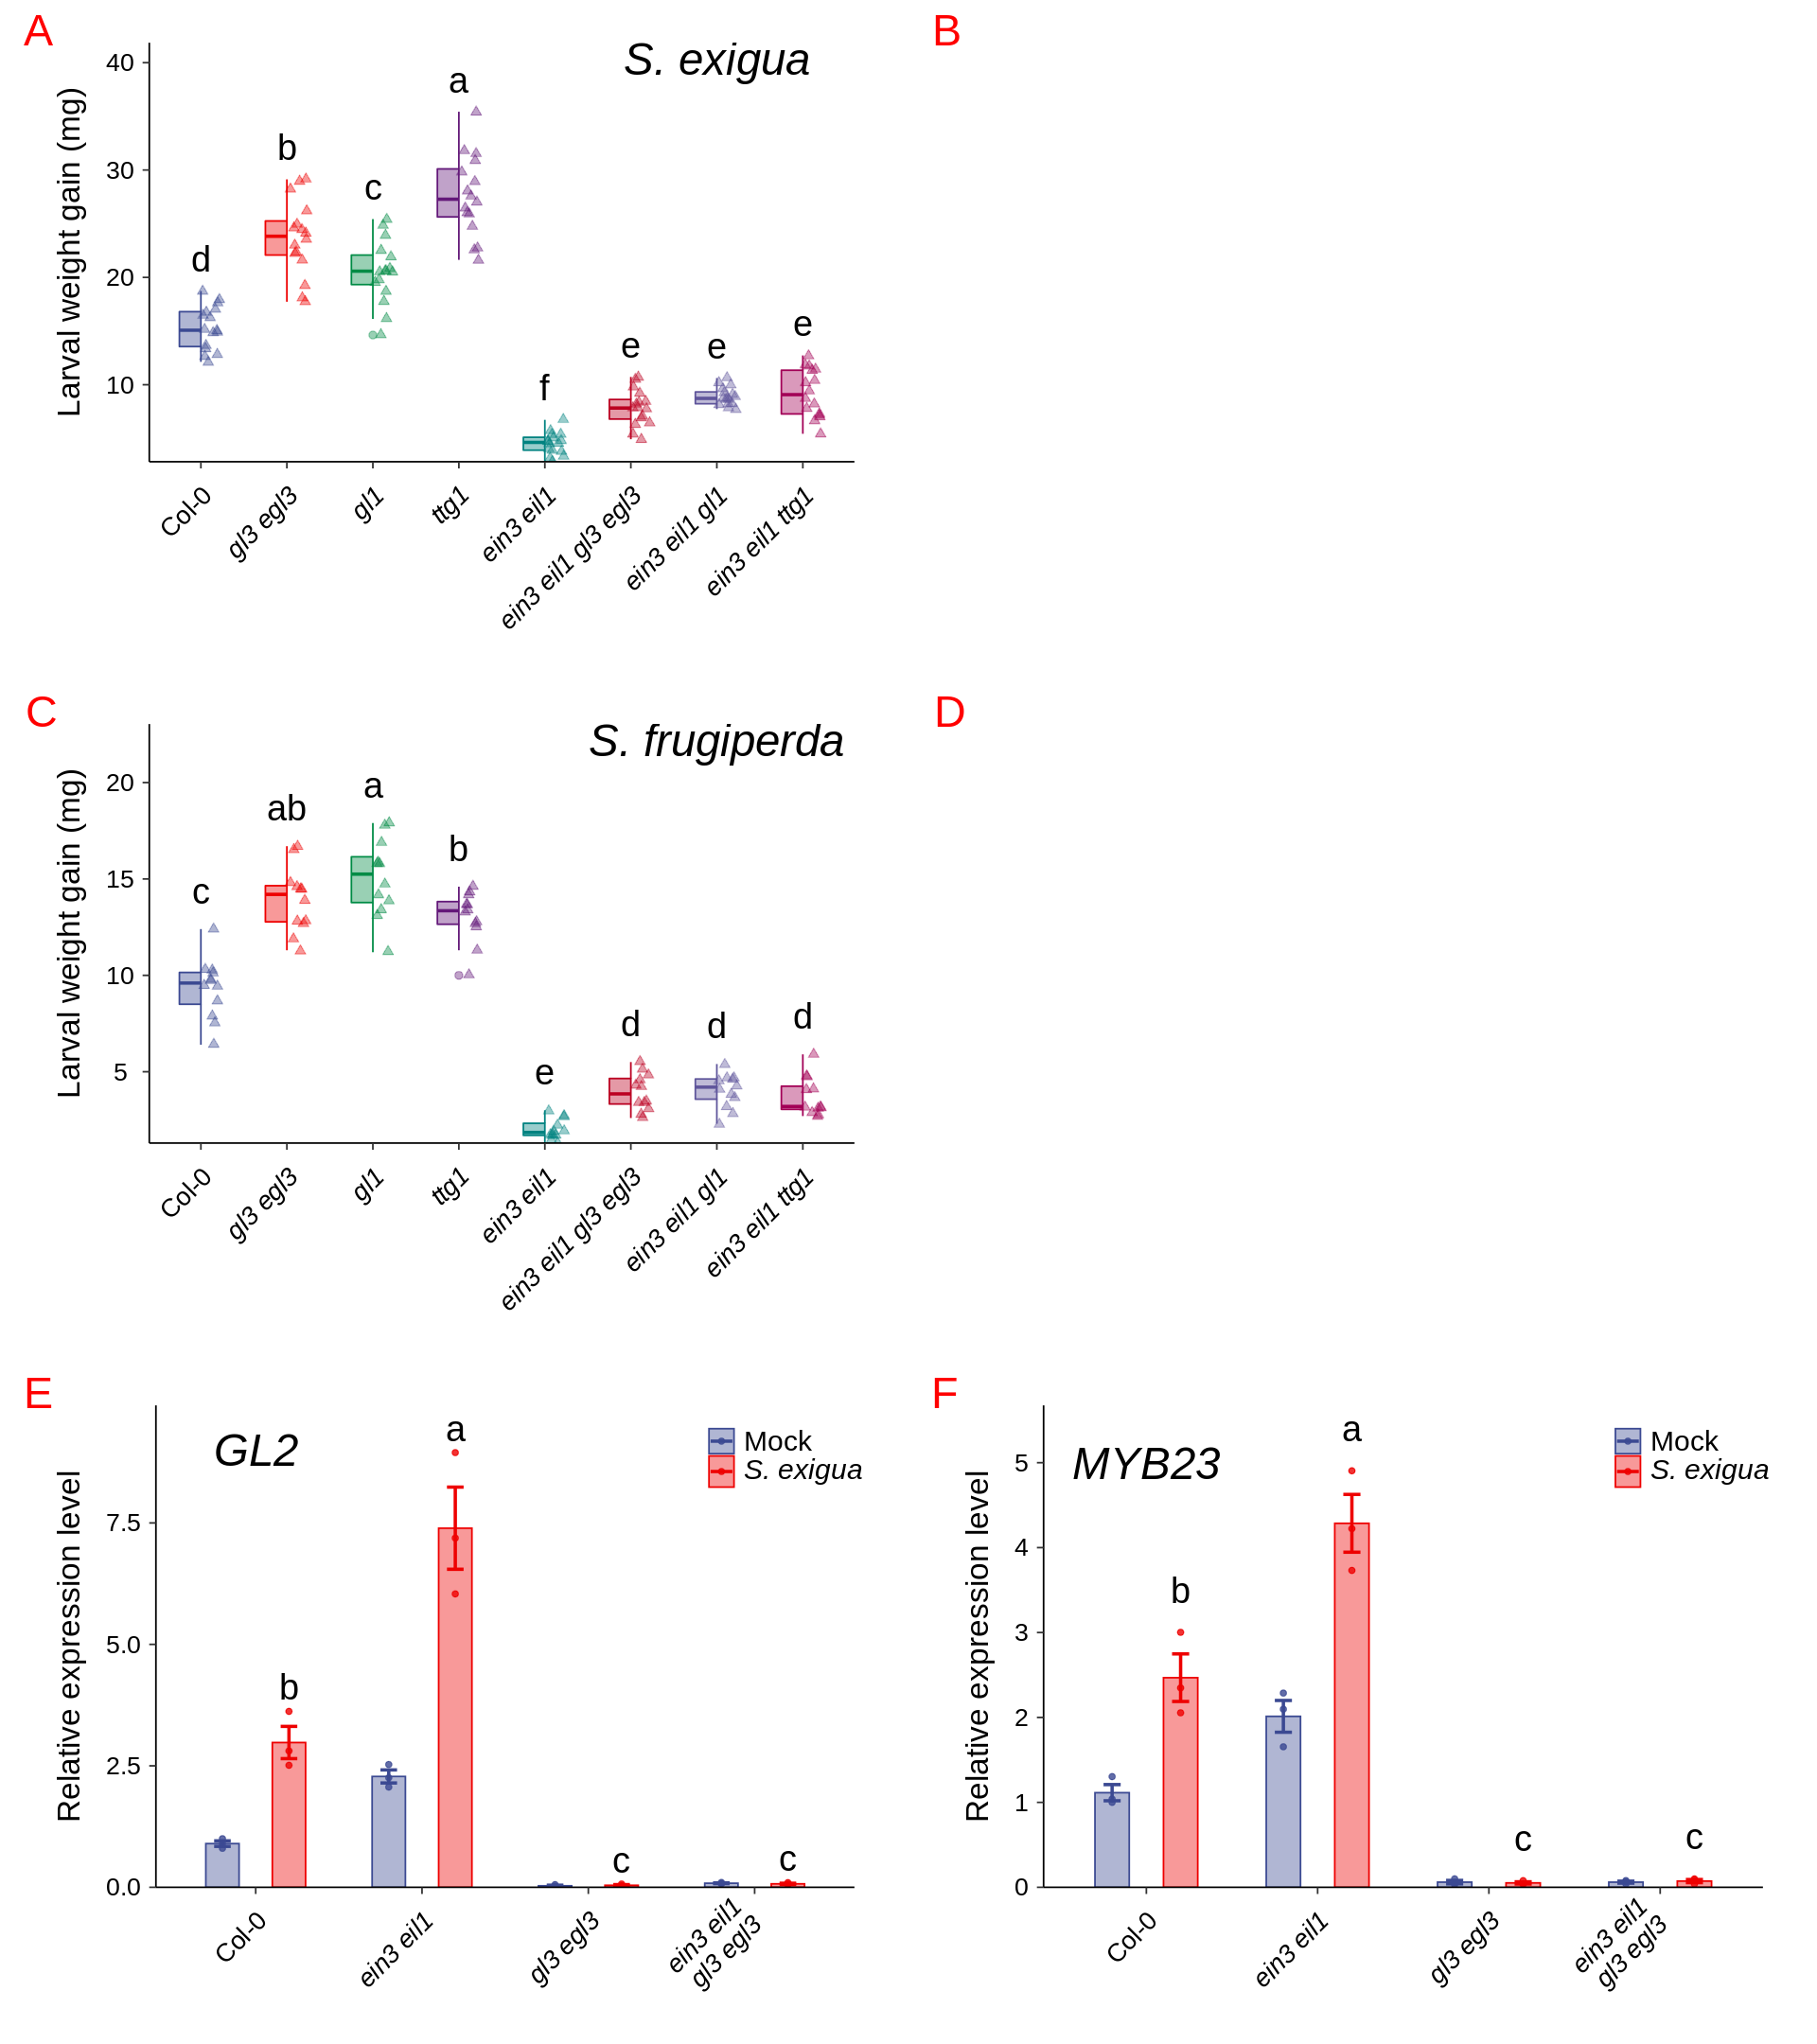

In [8]:
options(repr.plot.width = 16, repr.plot.height = 18)
fig7 <- plot_grid(A7,NULL,C7,NULL,E7,F7,
          ncol=2,
#           rel_widths=c(1,2),
          labels = c('A','B','C','D','E','F'),
          label_colour = 'red',
          label_x = 0.01,
          label_y = 1,
          label_fontface = 1,
          label_size = 28,
                 scale=0.9)
fig7
ggsave2("/Share2/home/qitiancong/00.project/04.Song_Lab/01.R_plots/01.data/7_fig_done/Figure7.png",
      fig7, height=18, width=16, dpi=300)